## Problem 4

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Generate a gaussian signal

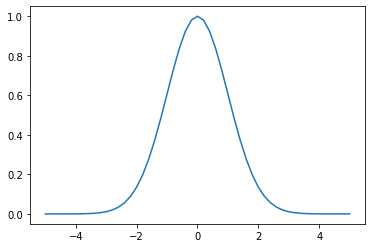

In [6]:
npt=51 #number of points to use
nset=10000  #number of independent sets to use

amp = 1 #amplitude of our signal

x = np.linspace(-5,5,npt)
y_true = amp*np.exp(-x**2/2) #this is our signal
A=y_true #this will be our model template to fit for amplitude

plt.plot(x,A)
plt.show()

Add random noise extracted from gaussian distribution

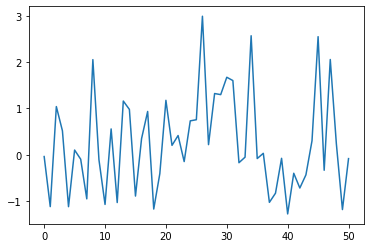

In [7]:
d=y_true+np.random.randn(npt)
plt.plot(np.arange(0,len(d)),d)
plt.show()

Use this method to add noise amd use this noise to calculate amplitude and variance, repeat "nset" number of times.

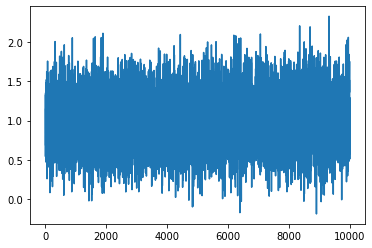

mean recovered amplitude is  0.9996551199847007


In [8]:
fit_amp=np.zeros(nset)
fit_var=np.zeros(nset)
for i in range(nset):
    d=y_true+np.random.randn(npt)
    mynoise=np.std(d)
    Ninv=np.eye(npt)/mynoise**2
    lhs=np.dot(A,np.dot(Ninv,A))
    rhs=np.dot(A,np.dot(Ninv,d))
    fit_amp[i]=rhs/lhs
    fit_var[i]=1.0/lhs
    
plt.plot(np.arange(0,len(fit_amp)),fit_amp)
plt.show()

print('mean recovered amplitude is ',fit_amp.mean())

Calculate the variance weighted mean and error bar

In [9]:
wts=1/fit_var
tot_mean=np.sum(wts*fit_amp)/np.sum(wts)
wt_tot=np.sum(wts)
err_tot=1/np.sqrt(wt_tot)
nsig=(1-tot_mean)/err_tot
print('mean recovered weighted amplitude is ',tot_mean,' plus/minus ',err_tot, 'for an error of ',nsig,' standard deviations')


mean recovered weighted amplitude is  0.9761877636852885  plus/minus  0.003438700210511237 for an error of  6.92477821763105  standard deviations
